In [401]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import random as rnd
import statistics as stat
import numpy as np

In [402]:
# --- globals --- #

# let there be n agents with random initial assesements
# every agent is represented by an integer in [0, n)
n = 10
epsilon = .5
alpha = .4
noise = .2
tau = .5
max_time = 50
data = []

In [403]:
# --- classes --- #

class Agent:
    def __init__(self, id):
        self.assesment = 1 - rnd.random() # values in (0, 1]
        self.previous_assesment = self.assesment # later needed to make the assesments of all agents change simultaneously
        self.peers = set()
        self.id = id
    
    def __str__(self):
        return f"assesment: {self.assesment} and peers: {self.peers}"

    def __repr__(self):
        return f"(Agent [{self.id}]: {self.assesment:.2f}, {self.peers})"

    def update_peers(self, agent_list):
        for potential_peer in agent_list:
            if (abs(potential_peer.assesment - self.assesment) < epsilon):
                self.peers.add(potential_peer)

In [404]:
# --- functions --- #

def print_agent_list(agent_list):
    print("[")
    for agent in agent_list:
        representation = f"    (Agent [{agent.id}]: {agent.assesment:.2f}, " + "{"
        representation += ", ".join(f"[{peer.id}]" for peer in agent.peers) + "})"
    
        print(representation)
    print("]")

In [405]:
# --- main code for abm --- #

agents = []
for i in range(n):
    agent = Agent(i)
    agents.append(agent)
    data.append([agent.id, 0, agent.assesment])

In [406]:
# for each agent let there be a set of agents with similar assesments
for i in range(n):
    agents[i].update_peers(agents)

In [407]:
# for each time step
for u in range(1, max_time): # we did the fist step by setting everything up

    # update the assesment of each agent to a ratio between the agents assesments and the mean of their peers
    for agent in agents:

        # observing
        observation = np.random.normal(tau, noise) # random value from bell curve around tau with noise as 2 std deviations
        while observation <= 0 or observation > 1: # cutting off observations outside (0, 1]
            observation = np.random.normal(tau, noise/2)
        observation *= (1 - alpha)

        # listening to peers
        collective_peer_assesment = alpha * stat.mean([peer.previous_assesment for peer in agent.peers])

        agent.assesment = observation + collective_peer_assesment
        data.append([agent.id, u, agent.assesment])

    # update each agents peers and prepare previous assesment for next loop
    for agent in agents:
        agent.update_peers(agents)
        agent.previous_assesment = agent.assesment
        

In [408]:
dataframe = pd.DataFrame(data, columns=["agent", "time", "assesment"])
dataframe

,agent,time,assesment
0,0,0,0.773021
1,1,0,0.479031
2,2,0,0.643974
3,3,0,0.085960
4,4,0,0.201389
...,...,...,...
495,5,49,0.462992
496,6,49,0.456418
497,7,49,0.370646
498,8,49,0.449048


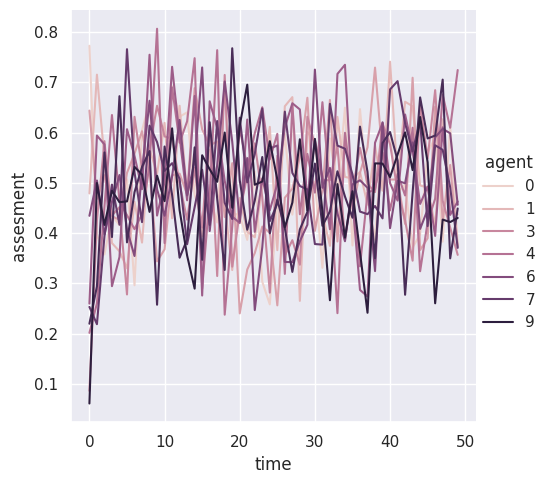

In [409]:
sns.set_theme()

sns.relplot(
    data=dataframe, kind="line",
    x="time", y="assesment", hue="agent")

plt.show()

(0.0, 1.0)

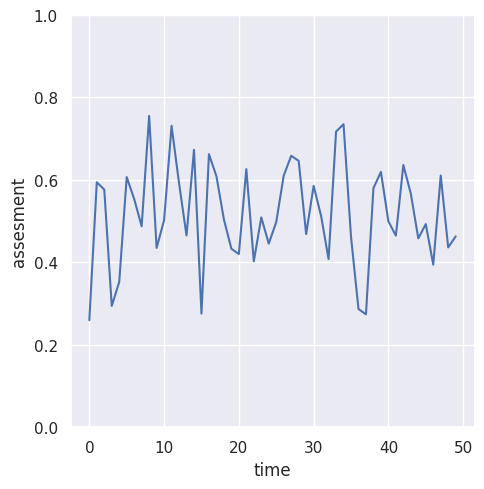

In [410]:

sns.relplot(
    dataframe[dataframe["agent"] == 5], kind="line",
    x="time", y="assesment", facet_kws={"sharex":False})
plt.ylim(0, 1)

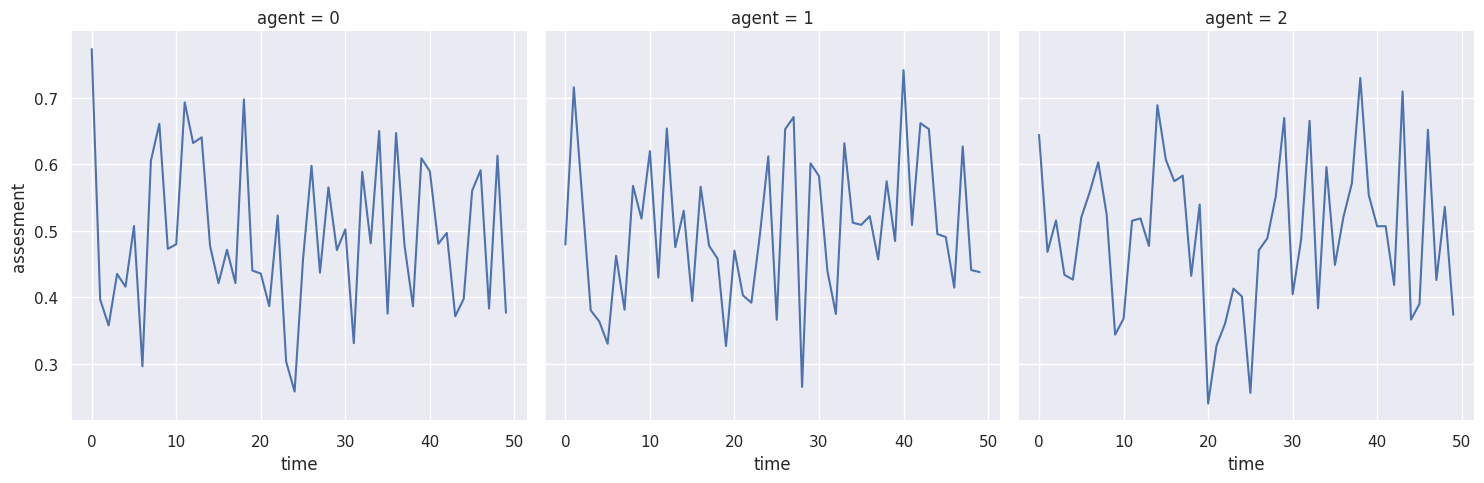

In [411]:
sns.relplot(
    data=dataframe[dataframe["agent"] < 3], kind="line",
    x="time", y="assesment", col="agent")

plt.show()

In [412]:
dataframe[dataframe["agent"] < 1]

,agent,time,assesment
0,0,0,0.773021
10,0,1,0.396468
20,0,2,0.357552
30,0,3,0.434946
40,0,4,0.415754
50,0,5,0.507101
60,0,6,0.296152
70,0,7,0.604927
80,0,8,0.660727
90,0,9,0.472687


In [413]:
dataframe[dataframe["time"] == 0]

,agent,time,assesment
0,0,0,0.773021
1,1,0,0.479031
2,2,0,0.643974
3,3,0,0.085960
4,4,0,0.201389
5,5,0,0.259594
6,6,0,0.434469
7,7,0,0.253044
8,8,0,0.219610
9,9,0,0.060723
